# Introduction to Data Science

Before you hand this problem in, make sure everything runs as expected. You should **restart the kernel and run all cells** by selecting 

`Kernel --> Restart Kernel and Run All Cells`

in the menubar.

- Of course, you should use **an appropriate kernel** on the Jupyterhub of the math department or locally, so that the right modules are used and the calculations can be checked deterministically.  
- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".
- Rename this problem sheet as follows:

      ps{number of lab}_{your user name}_problem{number of problem sheet in this lab}
    
  for example
    
      ps02_blja_problem1
    
- Please fill out the cell below for **every submission**.

**Change in submission of files**: Please upload this submission until next Tuesday to your shared Nextcloud [https://tuc.cloud/](https://tuc.cloud/) directory with the name of your username which has been created during the third exercise lab.
If you have not yet been assigned to a shared Nextcloud folder, please contact me via email (jan.blechschmidt@mathematik.tu-chemnitz.de) as soon as possible.

In [ ]:
NAME = "Tanay Maurya"
EMAIL = "tanay.maurya@s2024.tu-chemnitz.de"
USERNAME = "tanay@tu-chemnitz.de"

---

# Introduction to Data Science
## Lab 8: Cross-validation for a diabetes data set

### Part A: Importing the data set

The diabetes data set that we are using today contains ten measurements (age, sex, body mass index, average blood pressure, and six blood serum measurements) for each of the `n = 442` patients.

The response variable is a quantitative measure of disease progression one year after baseline.

**Task**: The data set is part of scikit learn, you can import it by executing the next cell.

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

Here, `diabetes` will be a dictionary.
A *dictionary* is an unordered collection of items.
While other compound data types have only `values` as elements (a *list* for example), a dictionary consists of `key: value` pairs.

**Task**: You can return the keys using the method `.keys()`.

In [2]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Here, you find that the *dictionary* diabetes contains the keys

    'data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'

Since `DESCR` sounds like description, we print its *value* by the following command
    
    print(diabetes.DESCR)

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Your first task will be to create a `pandas.DataFrame` to hold this information.

**Task (2 points)**:
Create a pandas data frame `X` holding the ten predictor variables. You should name the columns in the data frame using the optional argument `columns=cols`, where `cols` is given by
    
    cols = ["age", "sex", "bmi", "map", "tc",
            "ldl", "hdl", "tch", "ltg", "glu"]
            
Store the response variables as a numpy array `y`

**Hint**:
As in the iris data set, the diabetes data set is as a python dictionary.
The predictor variables can be accessed by `diabetes.data`, the responses via `diabetes.target`.

In [15]:
import pandas as pd
# YOUR CODE HERE
cols = ["age", "sex", "bmi", "map", "tc","ldl", "hdl", "tch", "ltg", "glu"]
X = pd.DataFrame(diabetes.data, columns=cols)
y = diabetes.target

In [16]:
assert 'X' in locals()
assert 'y' in locals()

In the following, we want to try two different estimation approaches:
1. At first, we use a plain training-test set approach, where we exclude $1/5$ of the data from training.
2. Our second approach is to estimate $5$ different models using 5-fold cross-validation

### Part B: Simple splitting into training and test/validation set

In this part, we want to train a linear model using a subset of our samples.
We have done this by hand so far, but there are also methods provided by `sklearn` which will do this work for us.

Use the function `train_test_split` from the module `sklearn.model_selection` to divide your data into a training and a test set.
Since this selection is made randomly, you should set the optional input `random_state` to fix the seed of the random number generator to ensure comparability by setting `random_state=1`.

**Task (1 point)**: Split your data into a training and a test set using the function `train_test_split`.
Your *test set should contain 20\% of the data*.
Use `random_state=1`.
Store your sets in variables `X_train, X_test, y_train, y_test`.

In [17]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
assert 'X_train' in locals()
assert 'y_train' in locals()
assert 'X_test' in locals()
assert 'y_test' in locals()

**Task (1 point)**:
Fit a *LinearRegression model* to your **training** data.
Use the appropriate method from `sklearn`.

Use your model to predict the response on the test set and store your prediction in a variable `test_pred`.

In [23]:
from sklearn.linear_model import LinearRegression
# YOUR CODE HERE
model = LinearRegression()
model.fit(X_train,y_train)
test_pred = model.predict(X_test)

In [24]:
assert 'test_pred' in locals()

Until now, our plots were always of the type predictor against response or against regression line.
Another way to display the quality of a regression fit is to plot the true values against the predicted values.
The closer the values are to the identity $f(x) = x$, the better the fit.

**Task (2 points)**:
Produce a scatterplot of the true values of the target variable in the test set against the predicted values. Draw also a line corresponding to the *ideal prediction*, i.e., each prediction is equal to its true value.
Label the axes accordingly.

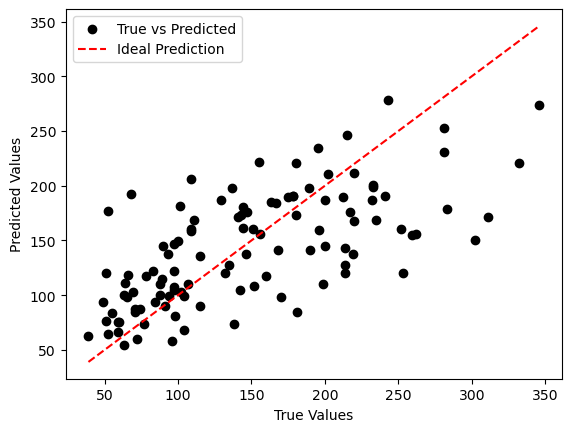

In [46]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
# YOUR CODE HERE
plt.scatter(y_test, test_pred, c='black', label="True vs Predicted")
ideal_line = np.linspace(min(y_test), max(y_test))
plt.plot(ideal_line, ideal_line, color='red', linestyle='--', label='Ideal Prediction')
plt.legend()
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show();

**Task (1 point)**: Compute the mean squared error $\text{MSE}_\text{test}$ on the test set.
You can either use the method `mean_squared_error` from the module `sklearn.metrics`, or you can implement it by yourself.
Store the mean squared error in a variable `mse_test`.

In [52]:
# YOUR CODE HERE
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, test_pred)

In [53]:
assert 'mse_test' in locals()

**Task (1 point)**: What is the proportion of variability that is explained by this linear fit within the test set. Store your answer in a variable `expl_var`.

*Remember*: A `LinearRegression` has a method that computes exactly this.

In [54]:
# YOUR CODE HERE
expl_var = model.score(X_test, y_test)

In [55]:
assert 'expl_var' in locals()

### Part C: K-Fold Cross-Validation

Next, we want to use cross-validation to select our model.
Scikit-learn is a powerful library and possesses numerous modules and functions.
Here, we explore the function `cross_val_score`, which can be imported by

    from sklearn.model_selection import cross_val_score
    
This function performs K-fold cross-validation and returns a score for each fold (this is the $R^2$-score by default).
    
**Task**: Please read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) and import the function `cross_val_score`.

In [56]:
from sklearn.model_selection import cross_val_score

The functions expects as a first argument an `estimator`.
We are informed by the documentation that this should be an "estimator object implementing \[the method\] ‘fit’".

This is fulfilled by all estimation methods used so far (e.g. linear models, logistic regression, LDA).
In the case of a linear regression fit, this could be
    
    model = linear_model.LinearRegression()

**Task (1 point)**: Perform a 5-fold cross-validation for a linear model on the diabetes data set and print the scores.
Store the output of the function `cross_val_score` in a variable `cv_scores`.

In [57]:
# YOUR CODE HERE
cv_scores = cross_val_score(model,X,y,cv=5)

In [58]:
assert 'cv_scores' in locals()

**Task (1 point)**: Use the function `cross_val_predict` in the module `sklearn.model_selection` to make prediction on the diabetes data set.
Store your answer in a variable `cv_pred`. Use again 5 folds.

In [59]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_predict
cv_pred = cross_val_predict(model,X,y,cv=5)

In [60]:
assert 'cv_pred' in locals()

**Task (1 point)**: Make a scatterplot of the true values in the test response against the predicted values similar to the one in **Part B**, but now using all of the data. Label the axes.

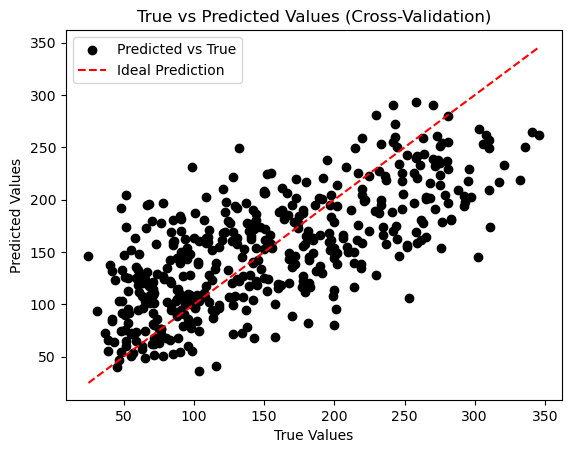

In [63]:
from matplotlib import pyplot as plt
%matplotlib inline
# YOUR CODE HERE
plt.scatter(y, cv_pred, color='black', label='Predicted vs True')
ideal_line = np.linspace(min(y), max(y))
plt.plot(ideal_line, ideal_line, color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('True vs Predicted Values (Cross-Validation)')
plt.show()

**Task (1 point)**: Compute the $R^2$-score of this model and store it in a variable `accuracy`. You can use the function `r2_score` from the module `sklearn.metrics`.

In [64]:
# YOUR CODE HERE
from sklearn.metrics import r2_score
accuracy = r2_score(y,cv_pred)
print("Cross-validated Accuracy:", accuracy)

Cross-validated Accuracy: 0.49532242216821853


In [ ]:
assert 'accuracy' in locals()

**Caution**: Although this $R^2$-score is higher than the score for the training/test set split, they are not really comparable since we computed them on different subsets of the data.
To get a more reliable comparison, we must keep part of the data as a so-called *hold-out* data set to be used for estimating the true learning error.